In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import joblib

# BASIC DATA ANALYSIS

In [5]:
df = pd.read_csv("sales.csv", encoding="latin1")

In [6]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [9]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
df['Category'].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [11]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [12]:
df.groupby('Order Date')['Sales'].sum().sort_values (ascending = True) # Day with the Highest Sales.

Order Date
7/19/2015         2.025
7/12/2017         3.816
1/28/2014         3.928
6/24/2014         4.272
10/1/2014         4.710
                ...    
9/8/2014      14228.428
3/23/2017     14816.068
10/22/2017    15158.877
10/2/2016     18452.972
3/18/2014     28106.716
Name: Sales, Length: 1237, dtype: float64

# DATA VISUALIZATION

In [14]:
# Sales By Category

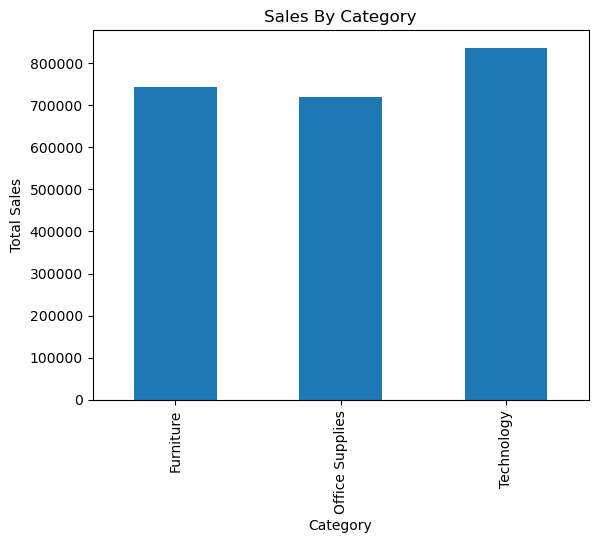

In [15]:
category_sales = df.groupby('Category')['Sales'].sum()

category_sales.plot(kind='bar', title='Sales By Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

In [16]:
# Time Series Sales

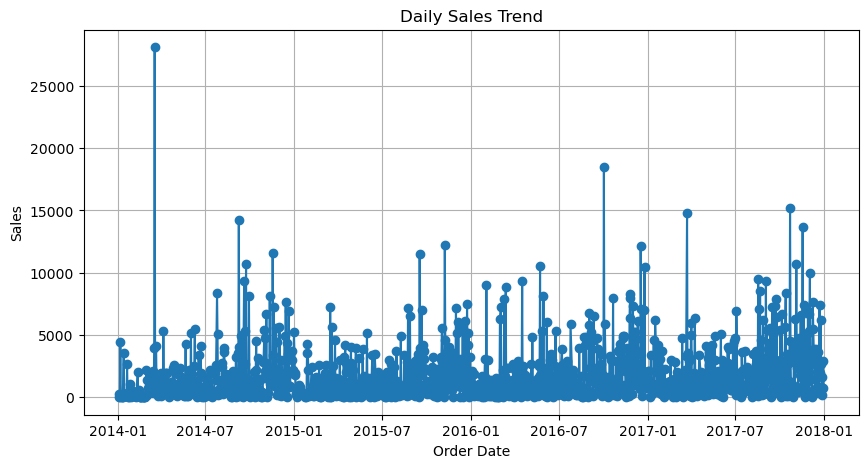

In [17]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
daily_sales = df.groupby('Order Date')['Sales'].sum()
plt.figure(figsize = (10,5))
plt.plot(daily_sales.index, daily_sales.values, marker = 'o')
plt.title('Daily Sales Trend')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [18]:
sales_per_product = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=True)

In [19]:
sales_per_product

Product Name
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac                   1.624
Avery 5                                                                            5.760
Xerox 20                                                                           6.480
Grip Seal Envelopes                                                                7.072
Avery Hi-Liter Pen Style Six-Color Fluorescent Set                                 7.700
                                                                                 ...    
GBC DocuBind TL300 Electric Binding System                                     19823.479
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Name: Sa

In [20]:
df.groupby('Product Name')['Sales'].sum().max()

61599.824

# Total Sales Per State: Shows The State With The Highest Revenue- Helpful in allocating funds and expansion

In [22]:
sales_per_state = df.groupby('State')['Sales'].sum().sort_values(ascending=True)

In [23]:
df['Country'].unique()

array(['United States'], dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

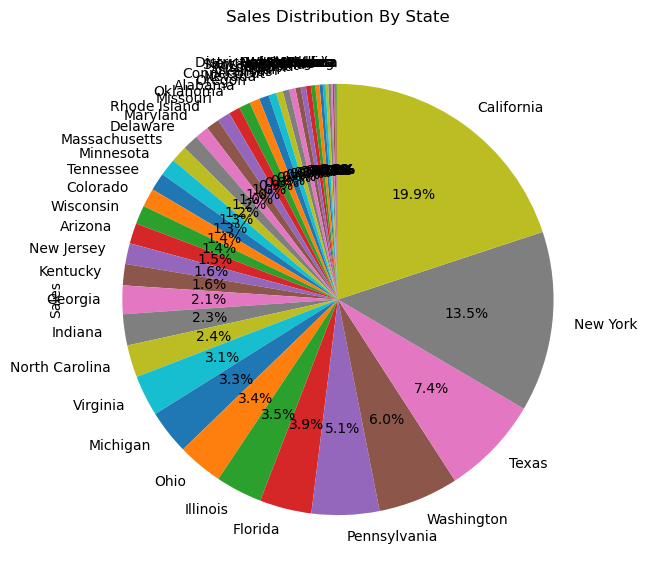

In [24]:
plt.figure(figsize = (7,7))
sales_per_state.plot(kind = 'pie', autopct = '%1.1f%%', startangle = 90)
plt.title('Sales Distribution By State')
plt.show

In [25]:
region_product_sales = df.groupby(['Region','Product Name'])['Sales'].sum()
region_product_sales = region_product_sales.reset_index()
best_products = region_product_sales.loc[region_product_sales.groupby('Region')['Sales'].idxmax()]

In [26]:
best_products

,Region,Product Name,Sales
284,Central,Canon imageCLASS 2200 Advanced Copier,17499.950
1606,East,Canon imageCLASS 2200 Advanced Copier,30099.914
2964,South,Cisco TelePresence System EX90 Videoconferenci...,22638.480
4081,West,Canon imageCLASS 2200 Advanced Copier,13999.960


In [27]:
region_product_sales

,Region,Product Name,Sales
0,Central,"""While you Were Out"" Message Book, One Form pe...",8.904
1,Central,"#10 Gummed Flap White Envelopes, 100/Box",16.520
2,Central,"#10 White Business Envelopes,4 1/8 x 9 1/2",78.350
3,Central,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",85.652
4,Central,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",12.224
...,...,...,...
5250,West,iKross Bluetooth Portable Keyboard + Cell Phon...,100.560
5251,West,iOttie HLCRIO102 Car Mount,31.984
5252,West,iOttie XL Car Mount,79.960
5253,West,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,158.312


# Predictive Model To Predict Sales By State In The Coming Years

In [29]:
# Convert Order Date to Date Time
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [30]:
# Extract the Year
df["Year"] = df["Order Date"].dt.year

In [31]:
# Group by State and Year
sales_by_state_year = df.groupby(["State", "Year"])["Sales"].sum().reset_index()

print(sales_by_state_year.head(10))


      State  Year      Sales
0   Alabama  2014   6139.090
1   Alabama  2015   3891.970
2   Alabama  2016   7651.330
3   Alabama  2017   1828.250
4   Arizona  2014   8295.235
5   Arizona  2015   9611.210
6   Arizona  2016   6242.019
7   Arizona  2017  11133.537
8  Arkansas  2014   6302.690
9  Arkansas  2015    443.610


In [32]:
# Features and Targets
X = sales_by_state_year[["State", "Year"]] 
y= sales_by_state_year['Sales']

In [33]:
# Preprocess: encode State (categorical), keep Year (numeric)
preprocessor = ColumnTransformer(
    transformers=[
        ("state", OneHotEncoder(handle_unknown="ignore"), ["State"]),
        ("year", "passthrough", ["Year"])
    ]
)

# Build pipeline: preprocessing + regression model
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

In [34]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model.fit(X_train, y_train)

# Check performance
score = model.score(X_test, y_test)
print(f"Model R² score: {score:.2f}")

Model R² score: 0.88


In [35]:
# Example: predict sales for California in 2026
new_data = pd.DataFrame({
    "State": ["California"],
    "Year": [2026]
})

prediction = model.predict(new_data)
print(f"Predicted Sales: {prediction[0]:,.2f}")

Predicted Sales: 121,126.57


In [36]:
# Save model to file
joblib.dump(model, "sales_predictor.pkl")

['sales_predictor.pkl']

In [37]:
# Save unique states
states = sales_by_state_year["State"].unique().tolist()
joblib.dump(states, "states.pkl")

['states.pkl']

In [71]:
df["Year"]

0       2016
1       2016
2       2016
3       2015
4       2015
        ... 
9989    2014
9990    2017
9991    2017
9992    2017
9993    2017
Name: Year, Length: 9994, dtype: int32